# Linear Regression: Question 10; `Part (a)-(g)`

**INITIALIZATION**

In [129]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 

carseats_data = pd.read_csv(r"C:\Users\kevin\OneDrive\Desktop\Strathmore\Classes\December 2024\Machine Learning\Assignments\Data\ALL CSV FILES - 2nd Edition\Carseats.csv")

print(carseats_data.shape)

carseats_data.head(3)


(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


**(a) Fit a multiple regression model to predict Sales using Price, Urban, and US**


In [130]:
# Set X and y
X = carseats_data[['Price', 'Urban', 'US']]

# Given that `urban` and `US` are categorical data, we transform that to dummy variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)
X = sm.add_constant(X)

y = carseats_data['Sales']

# Fit model and show summary
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        03:56:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**(b) Provide an interpretation of each coefficient in the model. Be careful some of the variables in the model are qualitative!**

   
***Intercept:*** *`13.0435`*
- Represents the expected average sales when all predictors (Price, Urban_Yes, US_Yes) are zero. Since Price, Urban, and US cannot realistically be zero in this context, the intercept mainly serves as a baseline value for predictions.


***Price*** *`-0.0545`*
- *Interpretation:* For each unit increase in Price, the average sales decrease by `0.0545` units, holding all other variables constant.
- *Significance:* The p-value for Price is `0.000` which is very small, indicating that price is *statistically significant* in explaining variations in sales.

***Urban_Yes:*** *`-0.0219`*
- *Interpretation:* If the store is located in an urban area (Urban_Yes = 1), the average sales decrease by `0.0219` units compared to stores in non-urban areas (Urban_Yes = 0), holding all other variables constant.
- *Significance:* The p-value for Urban_Yes is `0.936`, which is much larger than the typical significance level of 0.05. This indicates that Urban_Yes is *not statistically significant* in predicting sales.

***US_Yes:*** *`1.2006`*
- *Interpretation:* If the store is located in the US (US_Yes = 1), the average sales increase by `1.2006` units compared to stores located outside the US (US_Yes = 0), holding all other variables constant.
- *Significance:* The p-value for US_Yes is `0.000`, indicating that this variable is *highly statistically significant* in explaining variations in sales.

***Overall Model Fit:***
- The **`R-squared`** value of `0.239` indicates that `23.9%` of the variability in sales is explained by the model. While this suggests that the model has limited explanatory power, the significant predictors (Price and US_Yes) provide meaningful insights.

**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

-   *Sales = 13.0435 - 0.545(Price) - 0.0219(Urban_Yes) + 1.2006(US_Yes)*


**(d) For which of the predictors can you reject the null hypothesis H0 : #j = 0?**
- Given the p-value we reject the null hypothesis for *Price* and *Urban* as they are very small

**(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is**

In [131]:
# Using statsmodel formula api for this part
import statsmodels.formula.api as smf
model1 = smf.ols(formula = 'Sales ~ Price + US', data=carseats_data)
reg_model = model1.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.66e-24
Time:                        03:56:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

**(f) How well do the models in (a) and (e) fit the data?**
- Looking at the value of R-Squared both (a) and (e) have the same value `0.239`, we can conclude that neither model fit the data very well. However, (e) is a better model compared to (a) as it uses less variables for the same level of R-Squared 

**(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).**
- For a 95% confidence interval, the range is calculated as:
    - *Lower Bound: Coefficient - 2 x Standard Error*
    - *Upper Bound: Coefficient + 2 x Standard Error*


In [132]:
#Coefficients and Standard Errors
coeff_stder = {
    'Intercept': (13.0308, 0.631),
    'US_Yes': (1.1996, 0.258),
    'Price': (-0.0545, 0.005),
}

# Calculating confidence intervals
def calc_ci(coef, stderr, confidence=0.95):
    z_score = 2
    lower = coef - z_score * stderr
    upper = coef + z_score * stderr
    return f"[{lower:.4f}, {upper:.4f}]"

# Print output
print("95% Confidence Intervals:")
for term, (coef, stderr) in coeff_stder.items():
    interval = calc_ci(coef, stderr)
    print(f"{term}: {interval}")

95% Confidence Intervals:
Intercept: [11.7688, 14.2928]
US_Yes: [0.6836, 1.7156]
Price: [-0.0645, -0.0445]


# Classification: Question 13; `Part (a)-(d)`

**INITIALIZATION**

In [1]:
from matplotlib.pyplot import subplots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
weekly_data = load_data('Weekly')
weekly_data.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up


**(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?**


- ***Numerical Summaries***

In [4]:
weekly_data['Direction'].value_counts()

Direction
Up      605
Down    484
Name: count, dtype: int64

In [5]:
weekly_data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [6]:
numeric_data = weekly_data.select_dtypes(include=["number"])
correlation_matrix = numeric_data.corr()
correlation_matrix


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


- ***Graphical Summaries***

In [7]:
# Pairplot to visualize relationships
sns.pairplot(weekly_data, hue="Direction")
plt.show()

NameError: name 'sns' is not defined

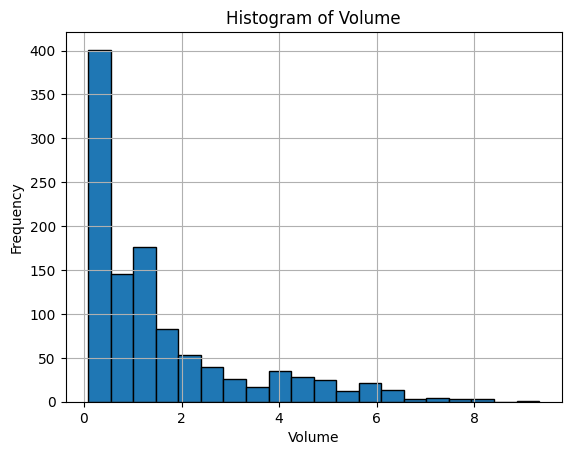

In [ ]:
# Histogram for Volume
weekly_data['Volume'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

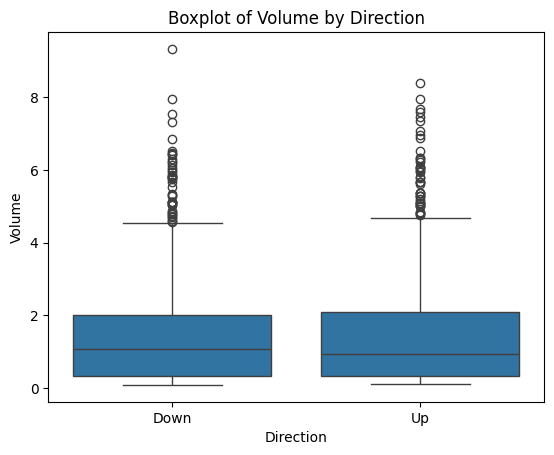

In [ ]:
sns.boxplot(x="Direction", y="Volume", data=weekly_data)
plt.title('Boxplot of Volume by Direction')
plt.show()

**Observations**
- From the histogram, Volume is positively skewed, with most values concentrated near zero and fewer larger values. This indicates that trading volumes are typically low but occasionally spike.
- The means and medians of Lag variables are close to zero, indicating they are centered around the mean with a relatively symmetrical distribution.
- The standard deviations for Lag variables are similar, suggesting comparable levels of variability.
- The Today variable, like the Lag variables, has a mean close to zero, suggesting that daily changes in returns tend to be small.
- There are slightly more Up days (605) than Down days (484).
- Volume has a relatively high positive correlation with Year (0.841), suggesting that trading volume has increased over time.
- Other correlations with Volume are small, indicating weak relationships with other variables.
- The scatterplots suggest no obvious separation of Up and Down directions based on the Lag variables. This indicates that these variables alone may not be strong predictors of market direction.

**Conclusion**
- The dataset shows clear trends in trading volume over time but weak relationships between lagged variables and daily returns (Today) or direction (Up/Down).

**(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.**
- Use the summary function to print the results. 
- Do any of the predictors appear to be statistically significant? If so, which ones?

In [ ]:
# Convert the response variable (Direction) to numeric
weekly_data['Dir_numeric'] = weekly_data['Direction'].map({'Up': 1, 'Down': 0})

# Define predictors and response
X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly_data['Dir_numeric']
X = sm.add_constant(X)

# Fit the logistic regression model and print result
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Dir_numeric   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                0.006580
Time:                        03:56:43   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

***Significant Predictors***
- *Constant:* The intercept is statistically significant `p-value = 0.002`. Its positive coefficient `0.2669` suggests a higher baseline likelihood of *Direction = Up.*
- *Lag2:* is statistically significant `p-value = 0.030`. Its positive coefficient `0.0584` indicates that higher values of Lag2 increase the likelihood of *Direction = Up.*
- *Other predictors* do not show strong evidence of association with Direction at the 5% significance level

**(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**


In [ ]:
# Predict probabilities and convert to binary predictions (threshold = 0.5)
predicted_probs = logit_model.predict(X)
predicted_classes = (predicted_probs > 0.5).astype(int)

# Compute and Display the confusion table
conf_matrix = confusion_table(y, predicted_classes)
print("Confusion Table:")
print(conf_matrix)

Confusion Table:
Truth       0    1
Predicted         
0          54  430
1          48  557


In [ ]:
# Extract confusion matrix values
true_negatives = conf_matrix.loc[0, 0]
false_positives = conf_matrix.loc[0, 1]
false_negatives = conf_matrix.loc[1, 0]
true_positives = conf_matrix.loc[1, 1]

# Compute and Print overall accuracy
accuracy = (true_negatives + true_positives) / conf_matrix.values.sum()
print(f"\nOverall Accuracy: {accuracy:.4f}")


Overall Accuracy: 0.5611


**Components of the Confusion Matrix:**
- *True Negatives:* `54`: The model correctly predicted "Down" (0) when the actual value was "Down".
- *False Positives:* `430`: The model incorrectly predicted "Up" (1) when the actual value was "Down".
- *False Negatives:* `48`: The model incorrectly predicted "Down" (0) when the actual value was "Up".
- *True Positives:* `557`: The model correctly predicted "Up" (1) when the actual value was "Up".

    ***Overal Accuracy:*** `0.5611` means the model correctly predicts the direction 56.11% of the time, which is just slightly better than random guessing (50%).

**(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.**
- Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [ ]:
# Split the data into training (1990–2008) and testing (2009–2010) sets
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] > 2008]

# Define predictors and response variable
X_train = train_data[['Lag2']]
y_train = train_data['Dir_numeric']

X_test = test_data[['Lag2']]
y_test = test_data['Dir_numeric']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model and print; training data
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Dir_numeric   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                0.003076
Time:                        03:56:43   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [ ]:
# Predict probabilities on the test set
predicted_probs = logit_model.predict(X_test)

# Convert probabilities to binary predictions (threshold = 0.5)
predicted_classes = (predicted_probs > 0.5).astype(int)

# Compute the confusion matrix for the test data
conf_matrix = confusion_table(y_test, predicted_classes)

# Display the confusion matrix
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Compute and display overall accuracy
true_negatives = conf_matrix.loc[0, 0]
false_positives = conf_matrix.loc[0, 1]
false_negatives = conf_matrix.loc[1, 0]
true_positives = conf_matrix.loc[1, 1]

accuracy = (true_negatives + true_positives) / conf_matrix.values.sum()
print(f"\nOverall Accuracy: {accuracy:.4f}")


Confusion Matrix (Test Data):
Truth      0   1
Predicted       
0          9  34
1          5  56

Overall Accuracy: 0.6250


# Problem Set 2: Decision Trees
The data (Insurance.csv) contains 5822 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy.

**Question 1**

***(a) Use the data to build a decision tress with the following hyper parameters(criteria=gini, max_depth =4, min_samples_split=1000, min_samples_leaf=200).***
  - Identify the feature that has the greatest influence on loan status.

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

insurance_data = pd.read_csv(r"C:\Users\kevin\OneDrive\Desktop\Strathmore\Classes\December 2024\Machine Learning\Notes\5.3 Insurance.csv")
insurance_data.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No


In [148]:
insurance_data.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [149]:
# Define the features and target variable
X = insurance_data.iloc[:, :-1]  # All columns except the last
y = insurance_data.iloc[:, -1]  # Last column (target: Purchase)

# Initialize the Decision Tree Classifier with specified hyperparameters and Fit model
tree_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    min_samples_split=1000, 
    min_samples_leaf=200, 
    random_state=42
)

tree_model.fit(X, y)
# Display the feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
     Feature  Importance
46  PPERSAUT    0.568976
0    MOSTYPE    0.268783
58    PBRAND    0.108343
36   MINKM30    0.031323
8     MGODGE    0.016664
..       ...         ...
80   AZEILPL    0.000000
81  APLEZIER    0.000000
82    AFIETS    0.000000
83   AINBOED    0.000000
84  ABYSTAND    0.000000

[85 rows x 2 columns]


In [150]:
# Identify the feature with the greatest influence
most_influential_feature = feature_importances.iloc[0]
print(f"\nThe feature with the greatest influence on loan status is: {most_influential_feature['Feature']}")

# Visualize the tree structure
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


The feature with the greatest influence on loan status is: PPERSAUT

Decision Tree Rules:
|--- PPERSAUT <= 5.50
|   |--- MINKM30 <= 2.50
|   |   |--- MGODGE <= 3.50
|   |   |   |--- class: No
|   |   |--- MGODGE >  3.50
|   |   |   |--- class: No
|   |--- MINKM30 >  2.50
|   |   |--- MBERARBG <= 1.50
|   |   |   |--- class: No
|   |   |--- MBERARBG >  1.50
|   |   |   |--- MOSTYPE <= 30.50
|   |   |   |   |--- class: No
|   |   |   |--- MOSTYPE >  30.50
|   |   |   |   |--- class: No
|--- PPERSAUT >  5.50
|   |--- MOSTYPE <= 8.50
|   |   |--- class: No
|   |--- MOSTYPE >  8.50
|   |   |--- PBRAND <= 2.50
|   |   |   |--- class: No
|   |   |--- PBRAND >  2.50
|   |   |   |--- class: No



***(b) Apply bagging, random forests, and gradient boosting classifiers to the Insurance data. Be sure to fit the models on a training set and to evaluate their performance on a test set.***
  - Briefly comment on their performance.

In [151]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=4, class_weight='balanced',random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Fit models to the training data
bagging_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Evaluate models on the test data
bagging_preds = bagging_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

# Compute accuracy scores
bagging_acc = accuracy_score(y_test, bagging_preds)
random_forest_acc = accuracy_score(y_test, random_forest_preds)
gradient_boosting_acc = accuracy_score(y_test, gradient_boosting_preds)

# Print results
print("Bagging Classifier Performance:")
print(f"Accuracy: {bagging_acc:.4f}")
print(classification_report(y_test, bagging_preds))
print(confusion_matrix(y_test, bagging_preds))

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {random_forest_acc:.4f}")
print(classification_report(y_test, random_forest_preds))
print(confusion_matrix(y_test, random_forest_preds))

print("\nGradient Boosting Classifier Performance:")
print(f"Accuracy: {gradient_boosting_acc:.4f}")
print(classification_report(y_test, gradient_boosting_preds))
print(confusion_matrix(y_test, gradient_boosting_preds))


Bagging Classifier Performance:
Accuracy: 0.9210
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      1628
         Yes       0.23      0.07      0.10       119

    accuracy                           0.92      1747
   macro avg       0.58      0.53      0.53      1747
weighted avg       0.89      0.92      0.90      1747

[[1601   27]
 [ 111    8]]

Random Forest Classifier Performance:
Accuracy: 0.8403
              precision    recall  f1-score   support

          No       0.96      0.86      0.91      1628
         Yes       0.22      0.52      0.31       119

    accuracy                           0.84      1747
   macro avg       0.59      0.69      0.61      1747
weighted avg       0.91      0.84      0.87      1747

[[1406  222]
 [  57   62]]

Gradient Boosting Classifier Performance:
Accuracy: 0.9319
              precision    recall  f1-score   support

          No       0.93      1.00      0.96      1628
         Yes      

**Results:**
1. **Bagging Classifier:**
  - *Overall Accuracy:* `92.1%`, primarily driven by excellent performance on the majority class (No).
    - *Performance on No:* Precision: `94%`, Recall: `98%` - highly effective at correctly identifying No.
    - *Performance on Yes:* Precision: `23%`, Recall: `7%` - struggles to identify the minority class (Yes), with frequent false negatives and false positives.
  - *Conclusion:* Bagging struggles with class imbalance, as it mostly predicts the majority class.
2. **Random Forest Classifier:**
  - *Overall Accuracy:* `84.03%`, slightly lower than Bagging.
    - *Performance on No:* Precision: `96%`, Recall: `86%` - slightly less effective at identifying No compared to Bagging.
    - *Performance on Yes:* Precision: `22%`, Recall: `52%`- better than Bagging in identifying Yes, with improved recall but still low precision.
  - *Conclusion:* Random Forest balances prediction for both classes better than Bagging but still struggles with precision for Yes.
3. **Gradient Boosting Classifier:**
  - *Overall Accuracy:* `93.19%`, the highest among the three models.
    - *Performance on No:* Precision: `93%`, Recall: `100%` - perfectly identifies No cases.
    - *Performance on Yes:* Precision: `50%`, Recall: `3%` - while precision is higher, recall is very poor, leading to frequent false negatives.
  - *Conclusion:* Gradient Boosting overfits to the majority class, leading to poor recall for the minority class (Yes).

**Question 2: Using the same data set as in Question 1 (the insurance.csv) answer the following questions.**

***(a) Create a training set containing 70% of the data and 30% test data.***

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(insurance_data.shape)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

(5822, 86)
Training set size: 4075 samples
Test set size: 1747 samples


***(b) Fit a support vector machine classifier (use a linear kernel function and choose a suitable value of C).***
- What is the number of support vectors?        

In [153]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel and C=1.0 and fit model; training data
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Retrieve and print the number of support vectors for each class
num_support_vectors = svm_model.n_support_
print(f"Number of support vectors for each class: {num_support_vectors}")
print(f"Total number of support vectors: {num_support_vectors.sum()}")

Number of support vectors for each class: [1408  229]
Total number of support vectors: 1637


***(c) Compute the training and test error rates for the kernel SVM in (ii).***

In [154]:
from sklearn.metrics import accuracy_score

# Compute predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate the training and test error rates and print results
train_error_rate = 1 - accuracy_score(y_train, y_train_pred)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)

print(f"Training Error Rate: {train_error_rate:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f}")

Training Error Rate: 0.0562
Test Error Rate: 0.0681


***(d) Use GridSearchCV to select an optimal cost (C). Consider values in the range 0.01 to 10 in steps of 2.***

In [155]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C values
param_grid = {'C': [0.01, 0.1, 1, 3, 5, 7, 10]}

# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best C value and corresponding accuracy
best_c = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Optimal C: {best_c}")
print(f"Cross-validated Accuracy with Optimal C: {best_score:.4f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Optimal C: 0.01
Cross-validated Accuracy with Optimal C: 0.9438


***(e) Compute the training and test error rate using this new value for cost***

In [156]:
# Refit the SVM model with the optimal C value
optimal_svm_model = SVC(kernel='linear', C=best_c, random_state=42)
optimal_svm_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = optimal_svm_model.predict(X_train)
y_test_pred = optimal_svm_model.predict(X_test)

# Calculate the training and test error rates
train_error_rate = 1 - accuracy_score(y_train, y_train_pred)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)

# Print the error rates
print(f"Training Error Rate with Optimal C: {train_error_rate:.4f}")
print(f"Test Error Rate with Optimal C: {test_error_rate:.4f}")

Training Error Rate with Optimal C: 0.0562
Test Error Rate with Optimal C: 0.0681
